In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset
df = pd.read_csv("https://bit.ly/telco-csv", index_col="customerID")

In [ ]:
# Display the shape and first 2 rows of the dataset
df.shape
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [ ]:
# Display dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

In [ ]:
# Check for missing values
df.isnull().sum()
df.isnull().sum().sum()

0

In [ ]:
# Convert the 'TotalCharges' column to numeric, replacing empty strings with NaN
df["TotalCharges"] = df["TotalCharges"].replace("", np.nan).astype(float)
df["TotalCharges"].head(1)

customerID
7590-VHVEG    29.85
Name: TotalCharges, dtype: float64

In [ ]:
# Drop rows with missing values
df = df.dropna()
df.isnull().sum().sum()

0

In [ ]:
# Identify binary columns
nuniq = df.nunique()
bi_cols = nuniq[nuniq == 2].index
bi_cols

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'PaperlessBilling', 'Churn'],
      dtype='object')

In [ ]:
# Display binary columns
df[bi_cols]

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn
customerID,,,,,,,
7590-VHVEG,Female,0,Yes,No,No,Yes,No
5575-GNVDE,Male,0,No,No,Yes,No,No
3668-QPYBK,Male,0,No,No,Yes,Yes,Yes
7795-CFOCW,Male,0,No,No,No,No,No
9237-HQITU,Female,0,No,No,Yes,Yes,Yes
...,...,...,...,...,...,...,...
6840-RESVB,Male,0,Yes,Yes,Yes,Yes,No
2234-XADUH,Female,0,Yes,Yes,Yes,Yes,No
4801-JZAZL,Female,0,Yes,Yes,No,Yes,No


In [ ]:
# Encode binary categorical variables
df["gender_encode"] = (df["gender"] == "Male").astype(int)
df["Partner_encode"] = (df["Partner"] == "Yes").astype(int)
df["Dependents_encode"] = (df["Dependents"] == "Yes").astype(int)
df["PhoneService_encode"] = (df["PhoneService"] == "Yes").astype(int)
df["PaperlessBilling_encode"] = (df["PaperlessBilling"] == "Yes").astype(int)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender_encode,Partner_encode,Dependents_encode,PhoneService_encode,PaperlessBilling_encode
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,Yes,Electronic check,29.85,29.85,No,0,1,0,0,1
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,Mailed check,56.95,1889.50,No,1,0,0,1,0
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,Yes,Mailed check,53.85,108.15,Yes,1,0,0,1,1
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,No,Bank transfer (automatic),42.30,1840.75,No,1,0,0,0,0
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,Yes,Electronic check,70.70,151.65,Yes,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,...,Yes,Mailed check,84.80,1990.50,No,1,1,1,1,1
2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,...,Yes,Credit card (automatic),103.20,7362.90,No,0,1,1,1,1
4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,...,Yes,Electronic check,29.60,346.45,No,0,1,1,0,1


In [ ]:
# Display value counts for the target variable 'Churn'
df["Churn"].value_counts()
df["Churn"].value_counts(1)

Churn
No     0.734215
Yes    0.265785
Name: proportion, dtype: float64

<Axes: xlabel='Churn', ylabel='count'>

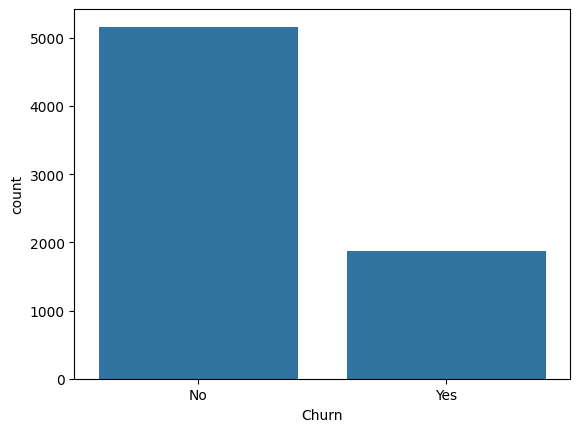

In [ ]:
# Plot the distribution of the target variable 'Churn'
sns.countplot(data=df, x="Churn")

In [ ]:
# Select numerical feature columns
feature_names = df.select_dtypes(include="number").columns
feature_names

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_encode', 'Partner_encode', 'Dependents_encode',
       'PhoneService_encode', 'PaperlessBilling_encode'],
      dtype='object')

In [ ]:
# Specify the target variable name
label_name = "Churn"
label_name

'Churn'

In [ ]:
# Split the dataset into features (X) and target (y)
X = df[feature_names]
y = df[label_name]
display(X.head(2))
display(y.head(2))

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_encode,Partner_encode,Dependents_encode,PhoneService_encode,PaperlessBilling_encode
customerID,,,,,,,,,
7590-VHVEG,0,1,29.85,29.85,0,1,0,0,1
5575-GNVDE,0,34,56.95,1889.50,1,0,0,1,0


customerID
7590-VHVEG    No
5575-GNVDE    No
Name: Churn, dtype: object

In [ ]:
# Display the shapes of features and target
X.shape, y.shape
df.shape

(7032, 25)

In [ ]:
# Split the data into training and testing sets (80/20 split)
split_count = int(df.shape[0] * 0.8)
split_count
train = df[:split_count].copy()
train.shape
test = df[split_count:].copy()
test

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender_encode,Partner_encode,Dependents_encode,PhoneService_encode,PaperlessBilling_encode
customerID,,,,,,,,,,,,,,,,,,,,,
2320-JRSDE,Female,0,Yes,Yes,1,Yes,No,No,No internet service,No internet service,...,Yes,Electronic check,19.90,19.90,Yes,0,1,1,1,1
2087-QAREY,Female,0,Yes,No,22,Yes,No,DSL,No,Yes,...,Yes,Mailed check,54.70,1178.75,No,0,1,0,1,1
0601-WZHJF,Male,0,Yes,No,14,No,No phone service,DSL,No,No,...,No,Electronic check,46.35,667.70,Yes,1,1,0,0,0
4423-JWZJN,Male,0,Yes,Yes,64,Yes,Yes,Fiber optic,No,No,...,No,Credit card (automatic),90.25,5629.15,No,1,1,1,1,0
5143-WMWOG,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,...,No,Electronic check,19.95,19.95,Yes,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,...,Yes,Mailed check,84.80,1990.50,No,1,1,1,1,1
2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,...,Yes,Credit card (automatic),103.20,7362.90,No,0,1,1,1,1
4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,...,Yes,Electronic check,29.60,346.45,No,0,1,1,0,1


In [ ]:
# Separate features and target for training and testing sets
X_train = train[feature_names]
y_train = train[label_name]

X_test = test[feature_names]
y_test = test[label_name]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5625, 9), (1407, 9), (5625,), (1407,))

In [ ]:
# Mission 2: Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# Initialize the model with specific hyperparameters
model = DecisionTreeClassifier(criterion="gini",
                               max_depth=6,
                               max_features=0.9,
                               random_state=42)
model

DecisionTreeClassifier(max_depth=6, max_features=0.9, random_state=42)

In [ ]:
# Train the model
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, max_features=0.9, random_state=42)

In [ ]:
# Predict on the test set
y_predict = model.predict(X_test)
y_predict[:5]

array(['No', 'No', 'No', 'No', 'No'], dtype=object)

In [ ]:
# Mission 3: Evaluation and Feature Importance
from sklearn.tree import plot_tree

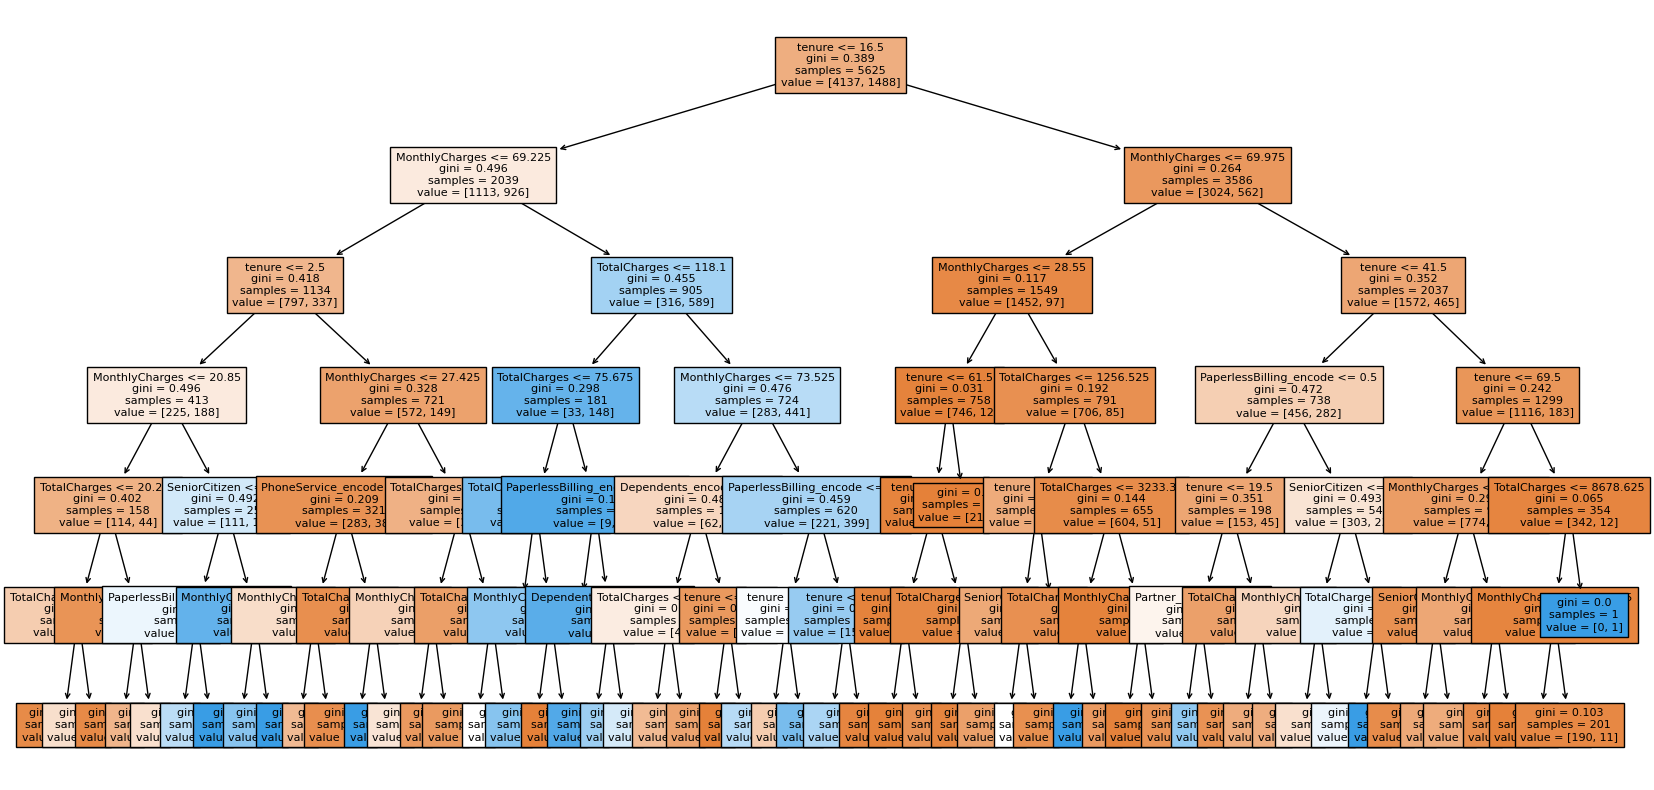

In [ ]:
# Plot the decision tree
plt.figure(figsize=(20, 10))
tree = plot_tree(model, feature_names=feature_names, filled=True, fontsize=8)

In [ ]:
# Display the textual representation of the tree
from sklearn.tree import export_text
export_text(model, max_depth=3, feature_names=feature_names)

'|--- tenure <= 16.50\n|   |--- MonthlyCharges <= 69.22\n|   |   |--- tenure <= 2.50\n|   |   |   |--- MonthlyCharges <= 20.85\n|   |   |   |   |--- truncated branch of depth 3\n|   |   |   |--- MonthlyCharges >  20.85\n|   |   |   |   |--- truncated branch of depth 3\n|   |   |--- tenure >  2.50\n|   |   |   |--- MonthlyCharges <= 27.43\n|   |   |   |   |--- truncated branch of depth 3\n|   |   |   |--- MonthlyCharges >  27.43\n|   |   |   |   |--- truncated branch of depth 3\n|   |--- MonthlyCharges >  69.22\n|   |   |--- TotalCharges <= 118.10\n|   |   |   |--- TotalCharges <= 75.68\n|   |   |   |   |--- truncated branch of depth 3\n|   |   |   |--- TotalCharges >  75.68\n|   |   |   |   |--- truncated branch of depth 3\n|   |   |--- TotalCharges >  118.10\n|   |   |   |--- MonthlyCharges <= 73.53\n|   |   |   |   |--- truncated branch of depth 3\n|   |   |   |--- MonthlyCharges >  73.53\n|   |   |   |   |--- truncated branch of depth 3\n|--- tenure >  16.50\n|   |--- MonthlyCharges

<Axes: ylabel='None'>

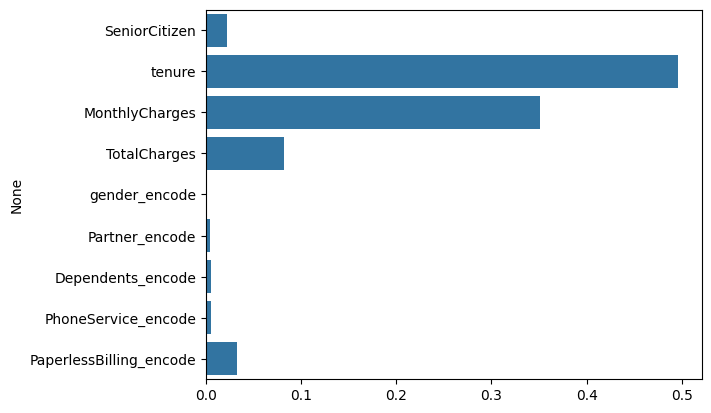

In [ ]:
# Visualize feature importance
# Sort feature importance in alphabetical order
sns.barplot(x=model.feature_importances_, y=feature_names)

In [ ]:
# Sort feature importance by descending order
sorted_x = sorted(model.feature_importances_, reverse=True)
x = model.feature_importances_.tolist()
y = feature_names

<Axes: >

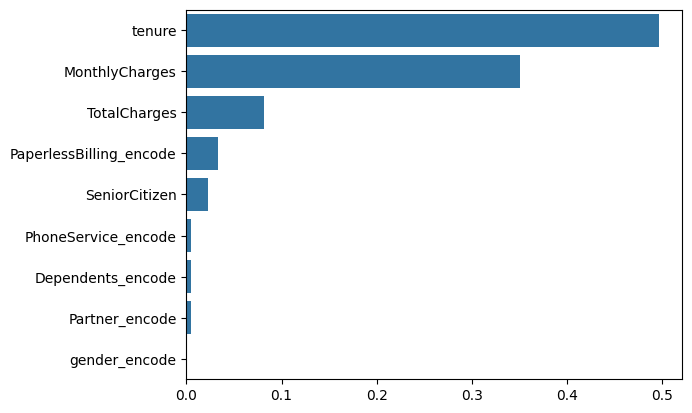

In [ ]:
# Align feature names with sorted importance
sorted_feature_names = [y[x.index(sorted_x[i])] for i in range(len(x))]
sns.barplot(x=sorted_x, y=sorted_feature_names)

In [ ]:
# Calculate and display the accuracy of the model
from sklearn.metrics import accuracy_score
round(accuracy_score(y_test, y_predict) * 100, 2)


78.68